In [1]:
import os
import numpy as np
import tensorflow_datasets as tfds
from imbDRL.agents.ddqn import TrainDDQN
from imbDRL.data import get_train_test_val
from imbDRL.utils import rounded_dict
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout


def run_dqn(df, y, eps, ws, bs, lr):
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

    episodes = eps
    warmup_steps = ws
    memory_length = warmup_steps
    batch_size = bs
    collect_steps_per_episode = 500
    collect_every = 500

 
    target_update_period = 400
    target_update_tau = 1
    n_step_update = 1

 
    layers = [
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(2, activation=None)
    ]

 

    learning_rate = lr
    gamma = 0.0
    min_epsilon = 0.5
    decay_episodes = episodes // 10


    min_class = [1]
    maj_class = [0]

 
    X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), y.to_numpy(), stratify=y, test_size=0.3)
    X_train, y_train, X_test, y_test, X_val, y_val = get_train_test_val(
        X_train, y_train, X_test, y_test, min_class, maj_class, val_frac=0.9

    )


    model = TrainDDQN(
        episodes,
        warmup_steps,
        learning_rate,
        gamma,
        min_epsilon,
        decay_episodes,
        target_update_period=target_update_period,
        target_update_tau=target_update_tau,
        batch_size=batch_size,
        collect_steps_per_episode=collect_steps_per_episode,
        memory_length=memory_length,
        collect_every=collect_every,
        n_step_update=n_step_update,
        model_path='modelfiles.pkl'

    )

 

    model.compile_model(X_train, y_train, layers)
    model.train(X_val, y_val, "F1")
    stats = model.evaluate(X_test, y_test, X_train, y_train)

    return rounded_dict(stats)


2023-05-31 15:24:56.310222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 15:24:57.732348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from imbDRL.data import get_train_test_val
from imbDRL.utils import rounded_dict
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("Kidney.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'blood pressure', 'specific gravity', 'albumin',
       'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [5]:
y = df['class']
df = df.drop(columns=['Unnamed: 0','class'])
df = df.astype(np.float64)

Imbalance ratio `p`:
	train:      n=11, p=0.647059
	test:       n=45, p=0.600000
	validation: n=94, p=0.594937


2023-05-31 15:25:02.016979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-31 15:25:02.017003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: heron178.eps.surrey.ac.uk
2023-05-31 15:25:02.017008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: heron178.eps.surrey.ac.uk
2023-05-31 15:25:02.017079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 515.65.1
2023-05-31 15:25:02.017095: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 515.65.1
2023-05-31 15:25:02.017099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 515.65.1


10_000 frames collected!
Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.
Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


2023-05-31 15:25:04.700857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype resource
	 [[{{node Placeholder/_10}}]]
2023-05-31 15:25:04.701232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]
Training the DDQN:   5%|▉                 | 500/10000 [00:00<00:05, 1749.61it/s]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Training the DDQN: 100%|█████████████████| 10000/10000 [00:20<00:00, 499.47it/s]

Best score: 0.543353!


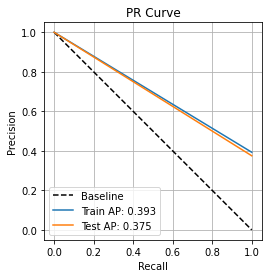

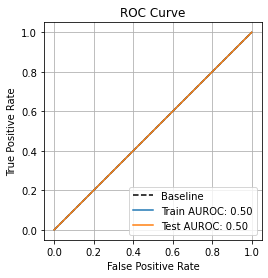

{'Gmean': 0.0,
 'F1': 0.545455,
 'Precision': 0.375,
 'Recall': 1.0,
 'TP': 45,
 'TN': 0,
 'FP': 75,
 'FN': 0}

In [6]:
run_dqn (df,y,10000,10000,100,0.005)

Imbalance ratio `p`:
	train:      n=11, p=0.647059
	test:       n=45, p=0.600000
	validation: n=94, p=0.594937


2023-05-31 15:25:44.135246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype resource
	 [[{{node Placeholder/_7}}]]
2023-05-31 15:25:44.135608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]


100_000 frames collected!


Training the DDQN: 100%|███████████████| 100000/100000 [02:00<00:00, 830.83it/s]

Best score: 0.559524!


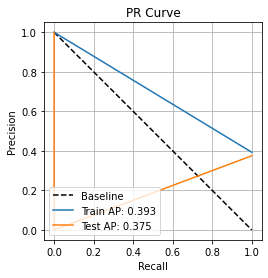

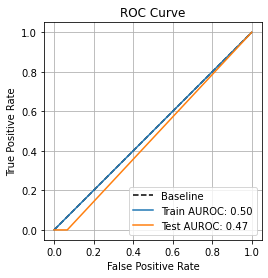

{'Gmean': 0.258199,
 'F1': 0.5625,
 'Precision': 0.391304,
 'Recall': 1.0,
 'TP': 45,
 'TN': 5,
 'FP': 70,
 'FN': 0}

In [7]:
run_dqn (df,y,100000,100000,5,0.05)

Imbalance ratio `p`:
	train:      n=10, p=0.555556
	test:       n=45, p=0.600000
	validation: n=95, p=0.605096


2023-05-31 15:27:46.709814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64
	 [[{{node Placeholder/_5}}]]
2023-05-31 15:27:46.710188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype resource
	 [[{{node Placeholder/_9}}]]


10_000 frames collected!


Training the DDQN: 100%|█████████████████| 10000/10000 [00:14<00:00, 668.17it/s]

Best score: 0.547550!


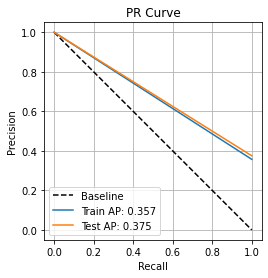

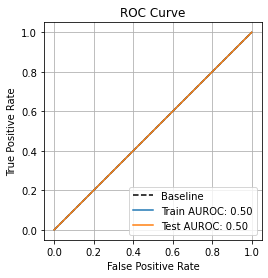

{'Gmean': 0.0,
 'F1': 0.545455,
 'Precision': 0.375,
 'Recall': 1.0,
 'TP': 45,
 'TN': 0,
 'FP': 75,
 'FN': 0}

In [8]:
run_dqn (df,y,10000,10000,50,0.0005)

Imbalance ratio `p`:
	train:      n=10, p=0.555556
	test:       n=45, p=0.600000
	validation: n=95, p=0.605096


2023-05-31 15:28:03.731333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype resource
	 [[{{node Placeholder/_14}}]]
2023-05-31 15:28:03.731635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype resource
	 [[{{node Placeholder/_8}}]]


10_000 frames collected!


Training the DDQN: 100%|█████████████████| 10000/10000 [00:13<00:00, 721.71it/s]

Best score: 0.547550!


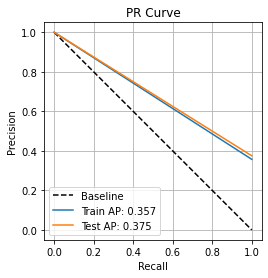

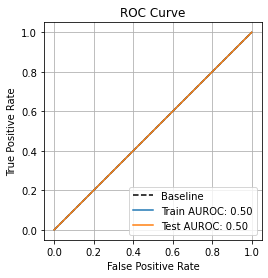

{'Gmean': 0.0,
 'F1': 0.545455,
 'Precision': 0.375,
 'Recall': 1.0,
 'TP': 45,
 'TN': 0,
 'FP': 75,
 'FN': 0}

In [9]:
run_dqn (df,y,10000,10000,25,0.005)